In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
names = 'Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline'
names = names.split(',')
df = pd.read_csv('./../wine/wine.data', names=names)

In [ ]:
def init_plotter(df):
    fig, axes = plt.subplots(13, 3, figsize=(15,80))
    for index, col in enumerate(df):
        axes[index,0].boxplot(df[col])
        axes[index,0].set_ylabel(col)

        sns.histplot(df[col], ax=axes[index, 1], kde=True)
        stats.probplot(df[col], plot=axes[index,2])
    plt.show()


init_plotter(df.drop('Class', axis=1))
        

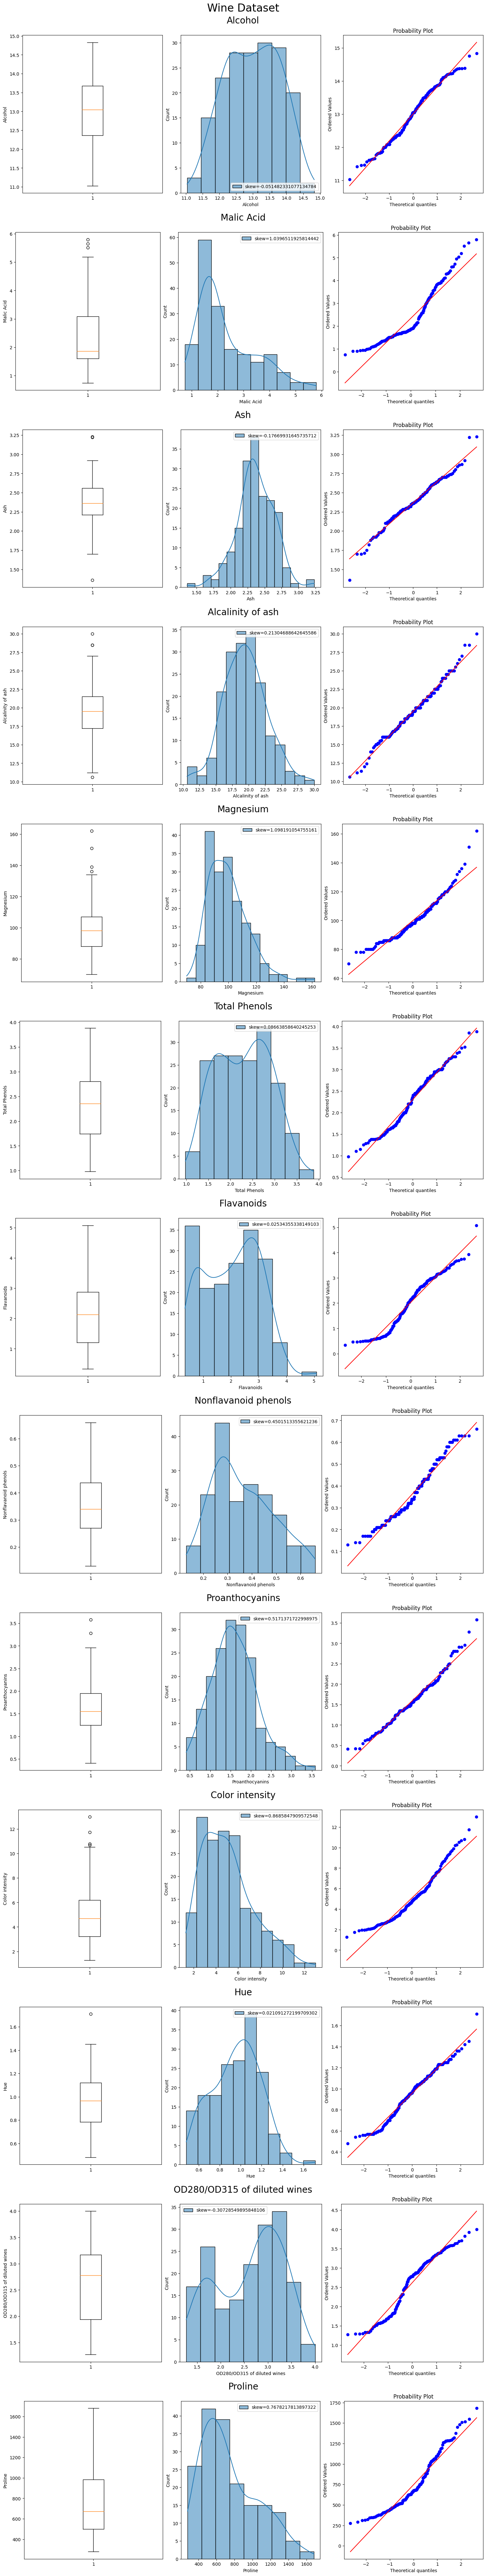

In [70]:
def init_plotter2(df):
    fig = plt.figure(constrained_layout=True, figsize=(15,80))
    fig.suptitle('Wine Dataset', fontsize=24)
    subfigs = fig.subfigures(nrows=13, ncols=1)

    col_list = df.columns
    for row, subfig in enumerate(subfigs):
        subfig.suptitle(col_list[row], fontsize=20)
        axes = subfig.subplots(nrows=1, ncols=3)
        axes[0].boxplot(df[col_list[row]])
        axes[0].set_ylabel(col_list[row])

        sns.histplot(df[col_list[row]], ax=axes[1], kde=True, label=f'skew={df[col_list[row]].skew()}')
        axes[1].legend()
        stats.probplot(df[col_list[row]], plot=axes[2])
    plt.show()

init_plotter2(df.drop('Class', axis=1))

## Inferences on skewness

Alcohol: skew value is low, mostly normal

Malic Acid: right skewed, whisker length long and skew value positive

Ash: left skewed, negative skew value, but close to zero. not very skewed.

Alcalinity of ash: left skewed, slightly. skew value negative, close to zero.

Magnesium: right skewed, skew value > 1

Total phenols: mostly normal, skew value positive, but close to zero. If skew, slightly right skewed.

Flavanoids: right skewed

Nonfalavanoid phenols: right skewed

Proanthocyanins: right skewed

Color intensity: right skewed

Hue: right skewed

Diluted wines: left skewed

Proline: right skewed

In [71]:
def normalize2(df, col):
    fig, axes = plt.subplots(1,3, figsize=(20,8))
    fig.suptitle(col, fontsize=20)
    og_skew = df[col].skew()
    sns.histplot(df[col], kde=True, ax=axes[0], label=f'skew={og_skew}', color='orange')
    axes[0].set_title('Original Data')
    axes[0].legend()
    new_col, lam = stats.boxcox(df[col])
    new_skew = pd.Series(new_col).skew()
    sns.histplot(new_col, kde=True, ax=axes[1], label=f'skew={new_skew}', color='red')
    axes[1].set_title(f'Normalised Data\nLambda={lam}')
    axes[1].legend()
    axes[1].set_xlabel(col)
    stats.probplot(new_col, plot=axes[2])

In [80]:
def normalize(df):
    fig = plt.figure(constrained_layout=True, figsize=(15,80))
    fig.suptitle('Normalized Wine Dataset', fontsize=24)
    col_list = df.columns
    subfigs = fig.subfigures(nrows=len(col_list), ncols=1)
    for row, subfig in enumerate(subfigs):
        subfig.suptitle(col_list[row], fontsize=20)
        new_col, lam = stats.boxcox(df[col_list[row]])
        axes = subfig.subplots(nrows=1, ncols=3)
        axes[0].boxplot(new_col)
        axes[0].set_ylabel(col_list[row])

        sns.histplot(new_col, ax=axes[1], kde=True, label=f'skew={pd.Series(new_col).skew()}')
        axes[1].legend()
        stats.probplot(new_col, plot=axes[2])
    plt.show()



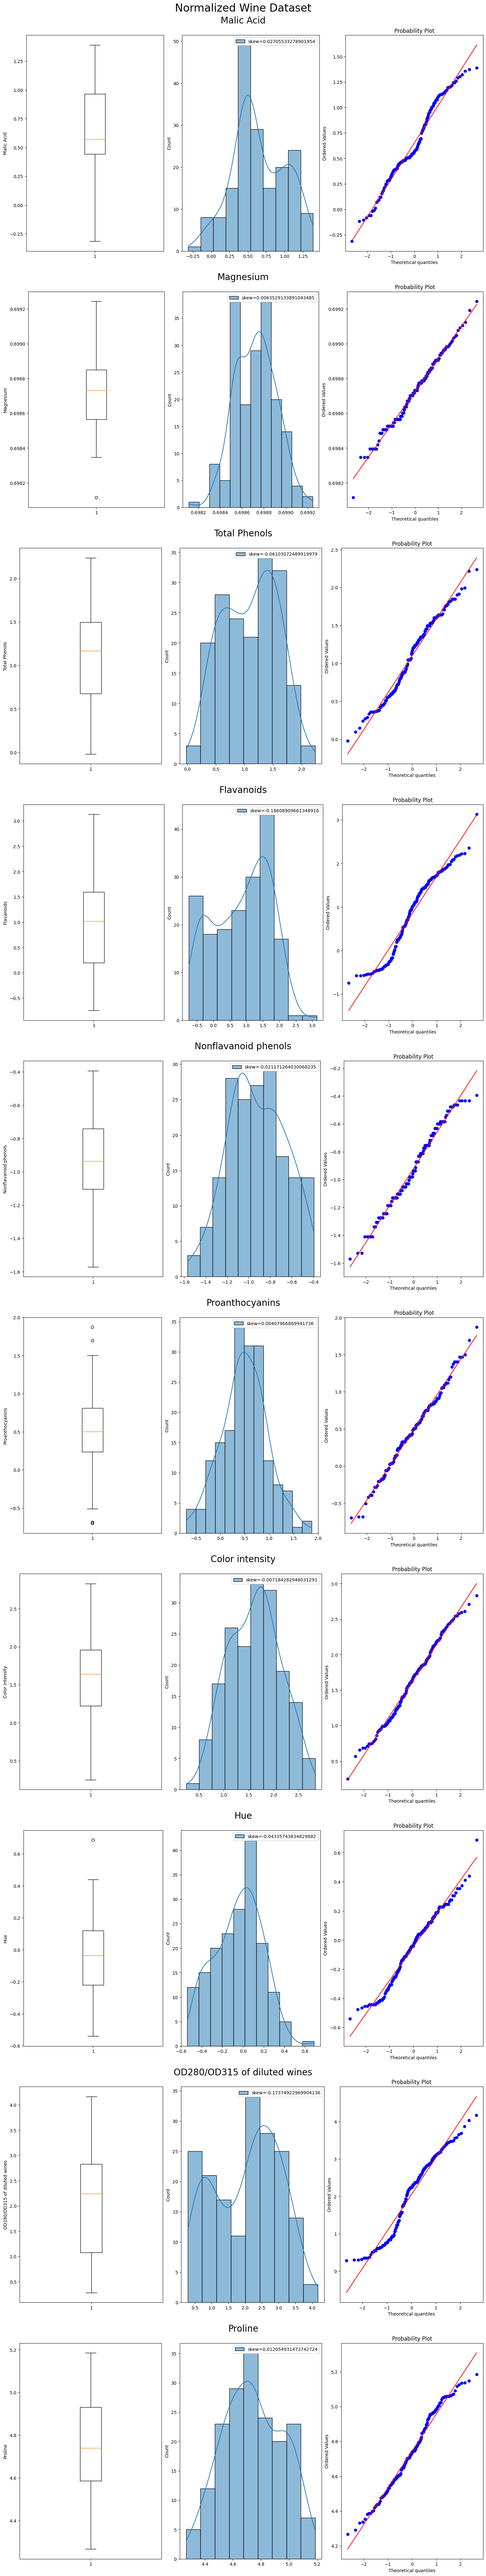

In [81]:
normalize(df.drop(['Class', 'Alcohol', 'Ash', 'Alcalinity of ash'], axis=1))
